# Busca em Grade com `SVC` para intervalo $[0, 1]$ no parâmetro `gamma`

A busca utilizou apenas dados dos 6 canais previamente escolhidos.

pela definição na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), por padrão `gamma` = $ \frac{1}{\text{n_features}}$

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from seaborn import scatterplot
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, GroupKFold

In [2]:
# lista de str ['01', '02', ..., '24']
file_range = ['{:0>2}'.format(chb) for chb in range(1, 25)]

def dataframe_from_chb(chb_number:str) -> pd.DataFrame:
    df = pd.read_csv(f'./chb{chb_number}/chb{chb_number}_com_dwt.csv')
    df['chb'] = chb_number
    return df

In [3]:
chb_df = pd.concat([dataframe_from_chb(file) for file in file_range], ignore_index=True)

some_6_channels = ['2', '3', '6', '7', '10', '14']

# Filtrando colunas do chb que são referentes aos canais em some_6_channels
columns_from_6_channels = [column for column in chb_df.columns if column.split('-')[-1] in some_6_channels]

chb_groups = chb_df.pop('chb').values
chb_y = chb_df.pop('target').values
chb_X = chb_df[columns_from_6_channels].values

pipe = make_pipeline(StandardScaler(), SVC(C=0.05, cache_size=500))

cv_columns = ['rank_test_score', 'param_svc__gamma', 'mean_test_score', 'std_test_score']

## Teste com parâmetros padrão

rank_test_score,param_svc__gamma,mean_test_score,std_test_score
1,auto,0.813465,0.176097
1,scale,0.813465,0.176097


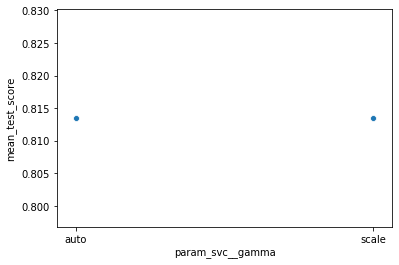

In [4]:
folds = GroupKFold(n_splits=len(np.unique(chb_groups))).split(chb_X, chb_y, chb_groups)

gs_default = GridSearchCV(
    estimator=pipe,
    param_grid={'svc__gamma':['auto', 'scale']},
    cv=folds
).fit(
    X=chb_X,
    y=chb_y,
    groups=chb_groups
)

default_results_df = pd.DataFrame(gs_default.cv_results_)[cv_columns]

scatterplot(
    data=default_results_df,
    x='param_svc__gamma',
    y='mean_test_score'
)

default_results_df.style.background_gradient(cmap='Blues', subset=['mean_test_score']).hide_index()

## Teste para intervalo $[0,1]$

Testando com 11 números igualmente espaçados no intervalo

In [4]:
folds = GroupKFold(n_splits=len(np.unique(chb_groups))).split(chb_X, chb_y, chb_groups)

gs_first = GridSearchCV(
    estimator=pipe,
    param_grid={'svc__gamma':np.linspace(0, 1, 11)},
    cv=folds
).fit(
    X=chb_X,
    y=chb_y,
    groups=chb_groups
)

pd.DataFrame(gs_first.cv_results_).to_csv('./csvs/12-gs-pipe-svc-oneVSall_wsc-3.csv', index=False)

rank_test_score,param_svc__gamma,mean_test_score,std_test_score
3,0.000000,0.500000,0.000000
2,0.100000,0.511488,0.034674
1,0.200000,0.515265,0.033818
3,0.300000,0.500000,0.000000
3,0.400000,0.500000,0.000000
3,0.500000,0.500000,0.000000
3,0.600000,0.500000,0.000000
3,0.700000,0.500000,0.000000
3,0.800000,0.500000,0.000000
3,0.900000,0.500000,0.000000


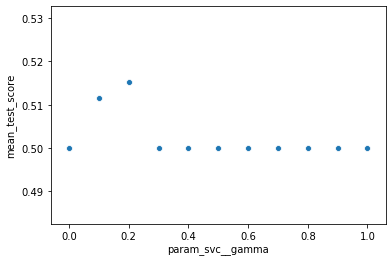

In [5]:
cv_results_df = pd.read_csv('./csvs/12-gs-pipe-svc-oneVSall_wsc-3.csv')[cv_columns]

scatterplot(
    data=cv_results_df,
    x='param_svc__gamma',
    y='mean_test_score'
)

cv_results_df.style.background_gradient(cmap='Blues', subset=['mean_test_score']).hide_index()

## Teste para intervalo $[0, 0.3]$

Testando para 21 números igualmente espaçados no intervalo

In [6]:
folds = GroupKFold(n_splits=len(np.unique(chb_groups))).split(chb_X, chb_y, chb_groups)

gs_second = GridSearchCV(
    estimator=pipe,
    param_grid={'svc__gamma':np.linspace(0, 0.3, 21)},
    cv=folds
).fit(
    X=chb_X,
    y=chb_y,
    groups=chb_groups
)

pd.DataFrame(gs_second.cv_results_).to_csv('./csvs/12-gs-pipe-svc-oneVSall_wsc-4.csv', index=False)

rank_test_score,param_svc__gamma,mean_test_score,std_test_score
15,0.000000,0.500000,0.000000
1,0.015000,0.784304,0.163002
2,0.030000,0.720273,0.153407
3,0.045000,0.662879,0.139668
4,0.060000,0.605295,0.117250
5,0.075000,0.556757,0.092636
6,0.090000,0.528108,0.059674
7,0.105000,0.508103,0.027288
14,0.120000,0.501635,0.010259
13,0.135000,0.502122,0.006326


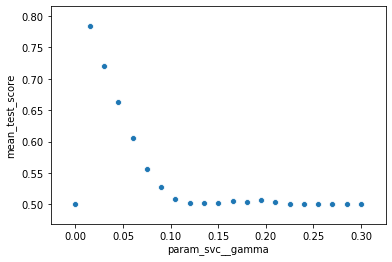

In [7]:
cv_2_results_df = pd.read_csv('./csvs/12-gs-pipe-svc-oneVSall_wsc-4.csv')[cv_columns]

scatterplot(
    data=cv_2_results_df,
    x='param_svc__gamma',
    y='mean_test_score'
)

cv_2_results_df.style.background_gradient(cmap='Blues', subset=['mean_test_score']).hide_index()

## Teste para intervalo $[0, 0.015]$

Testando para 11 números igualmente espaçados no intervalo

In [8]:
folds = GroupKFold(n_splits=len(np.unique(chb_groups))).split(chb_X, chb_y, chb_groups)

gs_third = GridSearchCV(
    estimator=pipe,
    param_grid={'svc__gamma':np.linspace(0, 0.015, 11)},
    cv=folds
).fit(
    X=chb_X,
    y=chb_y,
    groups=chb_groups
)

pd.DataFrame(gs_third.cv_results_).to_csv('./csvs/12-gs-pipe-svc-oneVSall_wsc-5.csv', index=False)

rank_test_score,param_svc__gamma,mean_test_score,std_test_score
11,0.000000,0.500000,0.000000
4,0.001500,0.810801,0.183250
2,0.003000,0.812454,0.179663
1,0.004500,0.814432,0.174232
3,0.006000,0.811411,0.169240
5,0.007500,0.806664,0.168900
6,0.009000,0.804216,0.168032
7,0.010500,0.799848,0.167756
8,0.012000,0.793700,0.168418
9,0.013500,0.788926,0.167046


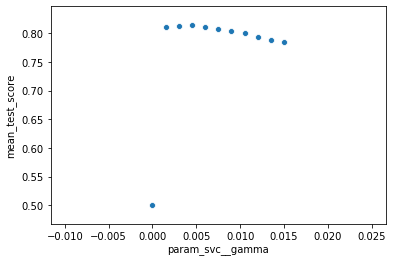

In [9]:
cv_3_results_df = pd.read_csv('./csvs/12-gs-pipe-svc-oneVSall_wsc-5.csv')[cv_columns]

scatterplot(
    data=cv_3_results_df,
    x='param_svc__gamma',
    y='mean_test_score'
)

cv_3_results_df.style.background_gradient(cmap='Blues', subset=['mean_test_score']).hide_index()